##Flight Delays (Regression)
Predicting CO₂ Emissions using ML, DL & XAI Objective The goal is to build predictive models that estimate CO₂ emissions across countries, regions, and sectors. You will:

Explore and preprocess the dataset.
Train and compare Machine Learning regression models.
Implement Deep Learning regression architectures.
Apply Explainable AI (XAI) techniques to interpret model predictions.
Compare performance and interpretability across methods. Dataset  Name: CO₂ Emissions Across Countries, Regions, and Sectors  Source: Kaggle dataset : https://www.kaggle.com/datasets/shreyanshdangi/co-emissionsacross-countries-regions-and-sectors/code  Description: Contains annual CO₂ emission values for multiple countries/regions, broken down by different sources (e.g., coal, gas, oil, cement, flaring, etc.).  Target variable: CO₂ emissions (continuous numeric values). Assignment Tasks Part 1: Exploratory Data Analysis (EDA)  Inspect dataset shape, datatypes, missing values.  Summary statistics for emissions across regions/sectors.  Time trends of CO₂ emissions (line plots).  Correlation heatmap between features.  Detect outliers and skewed distributions. Part 2: Preprocessing  Handle missing values (imputation or removal).  Feature engineering (e.g., log-transform skewed data, create per-capita emissions if population available).  Encode categorical variables (regions, countries).  Scale numerical features (StandardScaler / MinMaxScaler).  Train/Test split (e.g., 80/20). Part 3: Machine Learning Models (Regression) Implement and compare:
Linear Regression
Ridge/Lasso Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting / XGBoost Regressor
Support Vector Regressor (SVR) Evaluation Metrics:  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  R² Score Part 4: Deep Learning Models (Regression) Implement the following DL architectures:
Multi-Layer Perceptron (MLP)  Input → Dense(128, ReLU) → Dense(64, ReLU) → Dense(1, Linear).
Convolutional Neural Network (1D CNN)  Conv1D(64, kernel=3) → Conv1D(32, kernel=3) → Flatten → Dense(1, Linear).  Treat features as a sequence to capture local interactions.
Recurrent Neural Network (RNN – LSTM/GRU)  LSTM(64) → Dense(32, ReLU) → Dense(1, Linear).  Useful if modeling temporal sequences of emissions (per year).
Hybrid CNN + LSTM (Optional, Advanced)  Conv1D → MaxPooling → LSTM → Dense(1, Linear).
Autoencoder for Feature Compression + Regression Head  Encoder → Bottleneck → Decoder.  Use bottleneck features in a regression model. Evaluation Metrics:  MSE, RMSE, R². Part 5: Explainable AI (XAI for Regression) Apply interpretability techniques:  Feature Importance: Tree-based regressors (Random Forest, XGBoost).  Partial Dependence Plots (PDPs): Show marginal effect of features (e.g., coal use vs emissions).  Individual Conditional Expectation (ICE): Local effects for specific countries.  SHAP values: Show feature contributions for each prediction.  LIME for regression: Explain predictions for selected instances.  Integrated Gradients (DL models): Explain feature importance in neural nets. Task: Compare explanations for ML and DL models. Identify the most influential factors of CO₂ emissions. Part 6: Comparative Analysis  Compare regression performance of ML vs DL models.  Discuss trade-offs between accuracy and interpretability.  Which features consistently appear as most important?  How could policymakers use these insights? Deliverables  Python notebook (.ipynb) with:  EDA, preprocessing, ML, DL, and XAI code.  Visualizations and explanations.  Report (2–3 pages) including:  Methodology & results.  Comparison tables (ML vs DL).  XAI visualizations and insights.  Conclusion & recommendations.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyanshdangi/co-emissions-across-countries-regions-and-sectors")

print("Path to dataset files:", path)

100%|██████████| 4.01M/4.01M [00:00<00:00, 73.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shreyanshdangi/co-emissions-across-countries-regions-and-sectors/versions/1


In [2]:
!pip install keras

In [3]:

!pip install tensorflow

Using Colab cache for faster access to the 'co-emissions-across-countries-regions-and-sectors' dataset.
Using CSV file from kagglehub: /kaggle/input/co-emissions-across-countries-regions-and-sectors/Data.csv
Loading dataset from: /kaggle/input/co-emissions-across-countries-regions-and-sectors/Data.csv
Loaded dataset shape: (43746, 80)
Columns: ['Description', 'Name', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulati

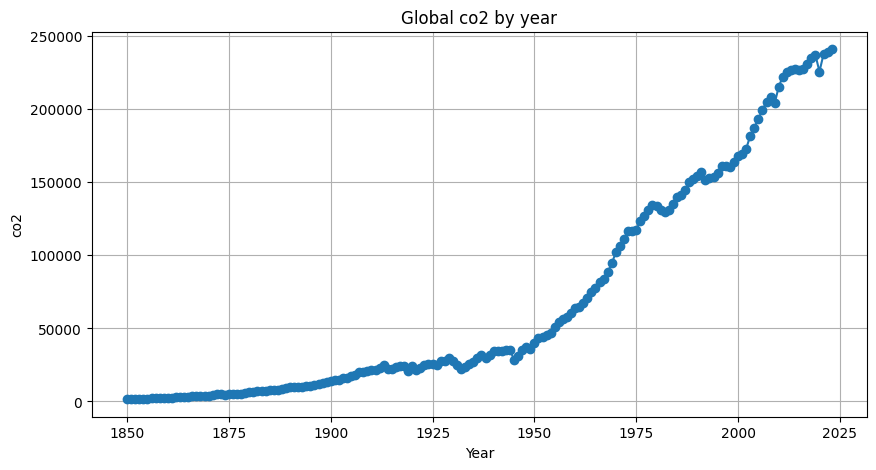

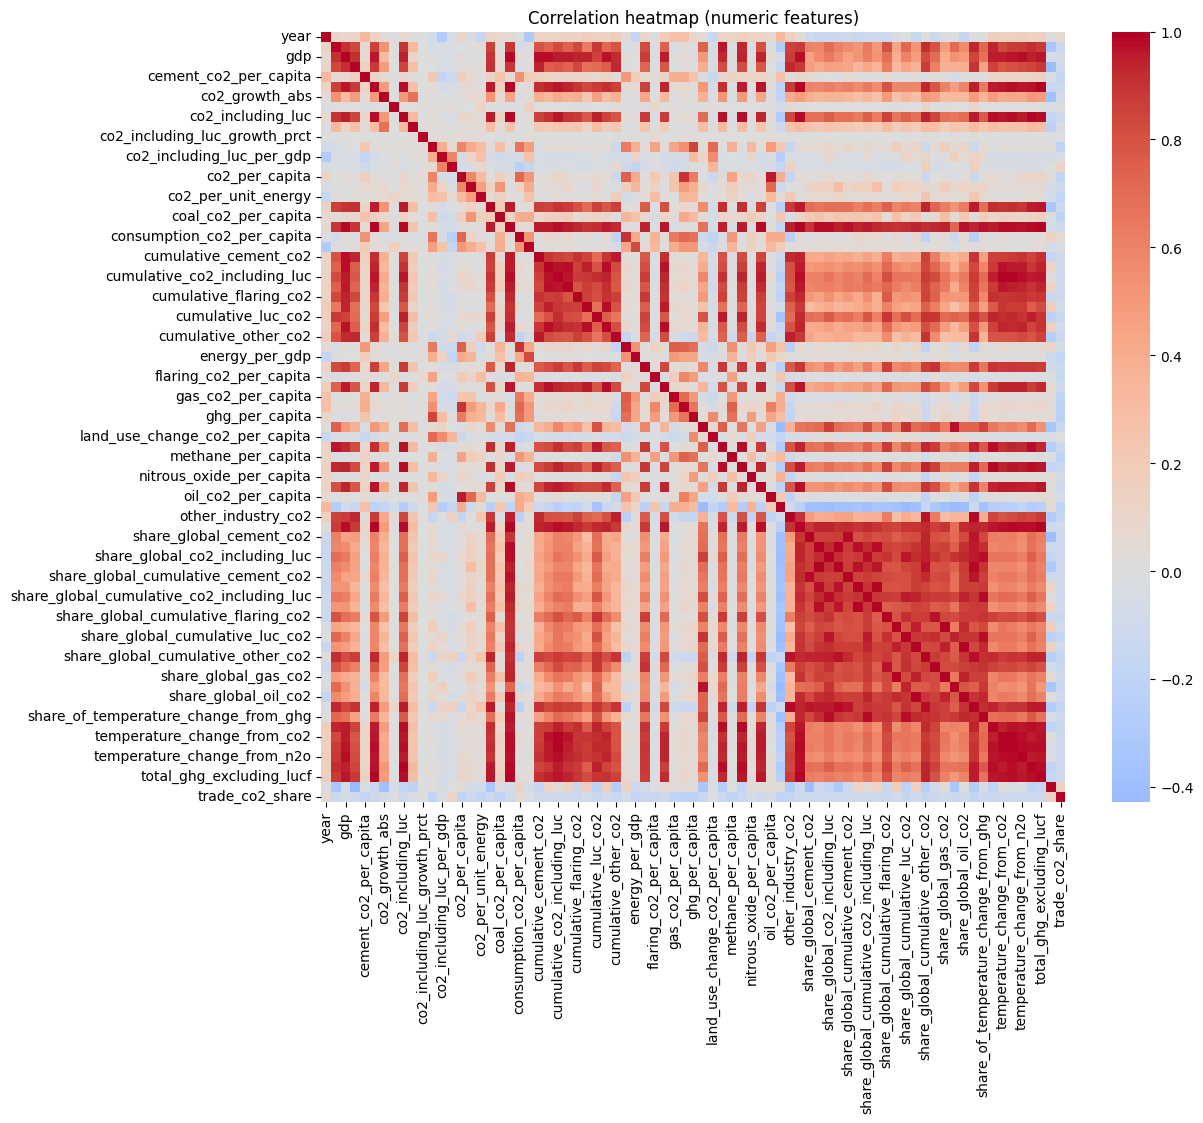


Highly skewed numeric columns (|skew|>1):
 - population: skew = 12.78
 - gdp: skew = 32.32
 - cement_co2: skew = 14.46
 - cement_co2_per_capita: skew = 4.70
 - co2: skew = 8.73
 - co2_growth_abs: skew = 5.71
 - co2_growth_prct: skew = 77.91
 - co2_including_luc: skew = 9.55
 - co2_including_luc_growth_abs: skew = 4.36
 - co2_including_luc_per_capita: skew = 6.32
 - co2_including_luc_per_gdp: skew = 12.43
 - co2_including_luc_per_unit_energy: skew = 41.37
 - co2_per_capita: skew = 28.59
 - co2_per_gdp: skew = 74.08
 - co2_per_unit_energy: skew = 15.83
 - coal_co2: skew = 9.13
 - coal_co2_per_capita: skew = 3.89
 - consumption_co2: skew = 4.86
 - consumption_co2_per_capita: skew = 1.97
 - consumption_co2_per_gdp: skew = 4.65
 - cumulative_cement_co2: skew = 14.89
 - cumulative_co2: skew = 11.71
 - cumulative_co2_including_luc: skew = 9.95
 - cumulative_coal_co2: skew = 8.49
 - cumulative_flaring_co2: skew = 10.36
 - cumulative_gas_co2: skew = 11.40
 - cumulative_luc_co2: skew = 8.83
 - 

In [ ]:
import os
import sys
import warnings
import tensorflow
import  keras
warnings.filterwarnings("ignore")

# -----------------------
# Basic imports
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

# ML models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except Exception:
    XGBOOST_AVAILABLE = False

# DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# XAI
try:
    import shap
    SHAP_AVAILABLE = True
except Exception:
    SHAP_AVAILABLE = False

# Utility for sparse arrays
from scipy.sparse import issparse

# -----------------------
# 1) Download dataset (Kaggle helper fallback)
# -----------------------
csv_path = None

# First try kagglehub (as in original script)
try:
    import kagglehub
    print("Downloading dataset from Kaggle via kagglehub...")
    path = kagglehub.dataset_download("shreyanshdangi/co-emissions-across-countries-regions-and-sectors")
    csv_files = [f for f in os.listdir(path) if f.lower().endswith('.csv')]
    if len(csv_files) == 0:
        raise FileNotFoundError("No CSV found in kagglehub download folder")
    csv_path = os.path.join(path, csv_files[0])
    print("Using CSV file from kagglehub:", csv_path)
except Exception as e1:
    print("kagglehub not available or failed:", e1)
    # Try official Kaggle API as a fallback (user must have kaggle.json configured)
    try:
        from kaggle.api.kaggle_api_extended import KaggleApi
        api = KaggleApi()
        api.authenticate()
        print("Downloading dataset from Kaggle via Kaggle API...")
        dataset = "shreyanshdangi/co-emissions-across-countries-regions-and-sectors"
        download_path = os.path.join(os.getcwd(), "kaggle_dataset")
        os.makedirs(download_path, exist_ok=True)
        api.dataset_download_files(dataset, path=download_path, unzip=True)
        csv_files = [os.path.join(download_path, f) for f in os.listdir(download_path) if f.lower().endswith('.csv')]
        if len(csv_files) == 0:
            raise FileNotFoundError("No CSV found after Kaggle API download")
        csv_path = csv_files[0]
        print("Using CSV file from Kaggle API:", csv_path)
    except Exception as e2:
        print("Kaggle API not available or failed:", e2)
        # Last fallback: expect user to provide a local CSV path
        if len(sys.argv) > 1:
            csv_path = sys.argv[1]
        else:
            raise RuntimeError(
                "Could not download dataset automatically. Please either install kagglehub or kaggle and/or pass a local CSV path as the first script argument."
            )

# -----------------------
# 2) Load dataset
# -----------------------
print("Loading dataset from:", csv_path)
df = pd.read_csv(csv_path)
print("Loaded dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head(5))

# -----------------------
# 3) Quick EDA
# -----------------------
print("\nDtypes:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(20))
print("\nNumeric summary:\n", df.describe().T)

TARGET_CANDIDATES = ['co2', 'CO2', 'co2_emissions', 'emissions', 'total_co2']
target_col = None
for t in TARGET_CANDIDATES:
    if t in df.columns:
        target_col = t
        break

if target_col is None:
    for c in df.columns:
        if 'co2' in c.lower() or 'emiss' in c.lower():
            target_col = c
            break

if target_col is None:
    raise ValueError("Target column not found automatically. Please set the target column name in the variable `target_col`.")
else:
    print("Detected target column:", target_col)

if 'year' in df.columns and target_col in df.columns:
    yearly = df.groupby('year')[target_col].sum().reset_index()
    plt.figure(figsize=(10,5))
    plt.plot(yearly['year'], yearly[target_col], marker='o')
    plt.title('Global {} by year'.format(target_col))
    plt.xlabel('Year'); plt.ylabel(target_col)
    plt.grid(True)
    plt.show()

# Correlation heatmap for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 1:
    plt.figure(figsize=(12,10))
    sns.heatmap(df[num_cols].corr(), cmap='coolwarm', center=0)
    plt.title("Correlation heatmap (numeric features)")
    plt.show()

# Skewed numeric features
skewed = [(c, df[c].skew()) for c in num_cols if abs(df[c].skew()) > 1]
if skewed:
    print("\nHighly skewed numeric columns (|skew|>1):")
    for c, s in skewed:
        print(f" - {c}: skew = {s:.2f}")
else:
    print("\nNo strongly skewed numeric columns detected (|skew|>1)")

# -----------------------
# 4) Preprocessing
# -----------------------
# Create X, y
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

# Drop rows where target is NaN
nan_mask = y.isnull()
X = X[~nan_mask]
y = y[~nan_mask]

print(f"\nRemoved {nan_mask.sum()} rows with missing target values.")
print(f"New dataset shape: {X.shape}")

# Identify numeric and categorical features
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric features (sample):", num_features[:10])
print("Categorical features (sample):", cat_features[:10])

# Build pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
], remainder='drop')

print("\nFitting preprocessor (this may take a moment if many categories exist)...")
X_processed = preprocessor.fit_transform(X)

# if sparse, convert to array for downstream libraries that expect dense arrays
if issparse(X_processed):
    X_processed = X_processed.toarray()

print("Processed feature shape:", X_processed.shape)

# Feature names after preprocessing (to use with SHAP / PDP)
num_out_names = num_features.copy()
cat_out_names = []
if len(cat_features) > 0:
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_names = ohe.get_feature_names_out(cat_features)
    cat_out_names = cat_names.tolist()

feature_names = num_out_names + cat_out_names
print("Total features after preprocessing:", len(feature_names))

# Train/test split
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=RANDOM_STATE)
print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)

# -----------------------
# 5) Machine Learning models (train & evaluate)
# -----------------------
def eval_preds(y_true, preds):
    mae = mean_absolute_error(y_true, preds)
    mse = mean_squared_error(y_true, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, preds)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

models = [
    ('LinearRegression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('DecisionTree', DecisionTreeRegressor(random_state=RANDOM_STATE)),
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingRegressor(random_state=RANDOM_STATE)),
]

if XGBOOST_AVAILABLE:
    models.append(('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE)))

models.append(('SVR', SVR()))

ml_results = []
for name, model in models:
    print(f"\nTraining {name} ...")
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        scores = eval_preds(y_test, preds)
        scores['Model'] = name
        ml_results.append(scores)
        print(name, scores)
    except Exception as e:
        print(f"Failed training {name}:", e)

ml_df = pd.DataFrame(ml_results)[['Model','MAE','MSE','RMSE','R2']].sort_values('RMSE')
print("\nML models comparison (sorted by RMSE):")
print(ml_df)

# Save ML comparison
ml_df.to_csv('ml_model_comparison.csv', index=False)
print("Saved ml_model_comparison.csv")

# -----------------------
# 6) Deep Learning models
# -----------------------
# Ensure reproducibility for TF (best-effort)
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

INPUT_DIM = X_train.shape[1]

# 6.1 MLP model
def build_mlp(input_dim):
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(128, activation='relu')(inp)
    x = layers.Dense(64, activation='relu')(x)
    out = layers.Dense(1, activation='linear')(x)
    model = keras.Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

print("\nTraining MLP ...")
mlp = build_mlp(INPUT_DIM)
history_mlp = mlp.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32, verbose=0)
mlp_preds = mlp.predict(X_test).ravel()
mlp_scores = eval_preds(y_test, mlp_preds)
mlp_scores['Model'] = 'MLP'
print("MLP scores:", mlp_scores)

# 6.2 CNN1D model (treat features as sequence)
def build_cnn1d(input_dim):
    inp = layers.Input(shape=(input_dim,1))
    x = layers.Conv1D(64, kernel_size=3, activation='relu')(inp)
    x = layers.Conv1D(32, kernel_size=3, activation='relu')(x)
    x = layers.Flatten()(x)
    out = layers.Dense(1)(x)
    model = keras.Model(inp, out)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

print("\nTraining CNN1D ...")
# reshape carefully; if only 1 sample or odd sizes this can fail
X_train_c = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_c = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
cnn = build_cnn1d(INPUT_DIM)
history_cnn = cnn.fit(X_train_c, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=0)
cnn_preds = cnn.predict(X_test_c).ravel()
cnn_scores = eval_preds(y_test, cnn_preds)
cnn_scores['Model'] = 'CNN1D'
print("CNN1D scores:", cnn_scores)

# Append DL results

dl_results = [mlp_scores, cnn_scores]
dl_df = pd.DataFrame(dl_results)[['Model','MAE','MSE','RMSE','R2']].sort_values('RMSE')
print("\nDL models comparison:")
print(dl_df)

# Save DL comparison
dl_df.to_csv('dl_model_comparison.csv', index=False)
print("Saved dl_model_comparison.csv")

# Merge ML + DL for full comparison
full_results = pd.concat([ml_df, dl_df], ignore_index=True, sort=False).fillna('')
full_results = full_results[['Model','MAE','MSE','RMSE','R2']]
full_results.to_csv('model_comparison_all.csv', index=False)
print("Saved model_comparison_all.csv")
print("\nFull results:\n", full_results)

# -----------------------
# 7) Explainable AI (XAI)
# -----------------------
# 7.1 Feature importance from tree model (RandomForest)
print("\nComputing feature importance from RandomForest...")
rf = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

# feature importances
importances = rf.feature_importances_
# show top 20
idx_sorted = np.argsort(importances)[::-1][:20]
top_names = [feature_names[i] if i < len(feature_names) else f"f{i}" for i in idx_sorted]
top_importances = importances[idx_sorted]

plt.figure(figsize=(10,6))
sns.barplot(x=top_importances, y=top_names)
plt.title("Top feature importances (RandomForest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 7.2 SHAP (if available)
if SHAP_AVAILABLE:
    print("\nRunning SHAP TreeExplainer for RandomForest (may take time)...")
    try:
        # use a small background sample for speed (ensure it's the same type as X_train)
        bg_idx = np.random.choice(X_train.shape[0], min(200, X_train.shape[0]), replace=False)
        background = X_train[bg_idx]
        explainer = shap.TreeExplainer(rf, data=background, feature_perturbation="tree_path_dependent")
        shap_values = explainer.shap_values(X_test)
        # shap_values can be list (for multioutput/class) or array
        shap_vals_arr = np.array(shap_values)
        print("Plotting SHAP summary plot...")
        # If shap_values is multi-dimensional list, pass the right axis to summary_plot
        try:
            shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=True)
        except Exception:
            # fallback: convert to array and pass
            shap.summary_plot(shap_vals_arr, X_test, feature_names=feature_names, show=True)
    except Exception as e:
        print("SHAP failed:", e)
else:
    print("\nSHAP not installed. Install with `pip install shap` to run SHAP explanations.")

# 7.3 Partial Dependence Plots (PDP) example for a top numeric feature (if exists)
if len(feature_names) > 0:
    print("\nPartial Dependence example on first feature (if applicable).")
    try:
        fig, ax = plt.subplots(figsize=(6,4))
        # Use the first feature index (0)
        PartialDependenceDisplay.from_estimator(rf, X_train, [0], feature_names=feature_names, ax=ax)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("PDP failed:", e)

# 7.4 LIME - provide guidance (not run inline to avoid heavy installs)
print("\nLIME: to generate local explanations, install lime (`pip install lime`) and use LimeTabularExplainer on the preprocessed X_train and model.predict.")

# 7.5 Integrated Gradients (DL) - brief guidance
print("\nIntegrated Gradients: for TensorFlow Keras models, use `tf-keras-vis` or implement IG manually to explain the MLP predictions for features.")

# -----------------------
# 8) Save trained models (optional)
# -----------------------
import joblib
joblib.dump(rf, 'rf_model.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')
mlp.save('mlp_model.h5')
cnn.save('cnn_model.h5')
print("\nSaved rf_model.joblib, preprocessor.joblib, mlp_model.h5, cnn_model.h5")

# -----------------------
# 9) Short summary printout
# -----------------------
print("\n=== SUMMARY ===")
print("Top ML results:\n", ml_df.head())
print("Top DL results:\n", dl_df.head())
print("All results saved to model_comparison_all.csv")
